In [3]:
# to prevent unnecessary warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import cv2
import json
import requests
from tqdm import tqdm

print(tf.__version__)



2.3.0


In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:


from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='176E-pLhoxTgWsJ3MeoJQV_GXczIA6g8D',
                                    dest_path='/content/animals.zip',
                                    unzip=True)



Unzipping...Done.


In [10]:


#importing necessary libraries
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
class_names = ['elefante_train','farfalla_train','mucca_train','pecora_train','scoiattolo_train']

IMG_SIZE = 224



In [11]:
#read the data from a directory
def get_data_from_folder(path):
  data = []
  for class_name in class_names: # iterate through classes
    try:
      files = glob.glob(path+"/"+class_name+"/*") # get files in each folder(class)
      for f in files:
        img = cv2.imread(f) #read the image
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resize the image
        data.append([np.array(img),class_names.index(class_name)]) #Append images and corresponding labels to data
    except:
      pass
  np.random.shuffle(data)
  return data



In [12]:
training_data = get_data_from_folder('/content/animal_dataset_intermediate/train')
testing_data = get_data_from_folder('/content/animal_dataset_intermediate/test')

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size = (224, 224)
batch_size = 32

train_ds = image_dataset_from_directory(
    "/content/animal_dataset_intermediate/train",
    labels = "inferred",
    label_mode = 'int',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =image_dataset_from_directory(
    "/content/animal_dataset_intermediate/train",
    labels = "inferred",
    label_mode = 'int',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)



Found 8196 files belonging to 5 classes.
Using 6557 files for training.
Found 8196 files belonging to 5 classes.
Using 1639 files for validation.


In [22]:
import pandas as pd

csv=pd.read_csv('/content/animal_dataset_intermediate/Testing_set_animals.csv')
file_name=csv.filename

In [27]:
#read the data from a directory
def test_get_data_from_folder(path):
  data = []
  for class_name in file_name: # iterate through classes
    try:
      files = glob.glob(path+"/"+class_name+"/*") # get files in each folder(class)
      for f in files:
        img = cv2.imread(f) #read the image
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resize the image
        data.append([np.array(img),class_names.index(class_name)]) #Append images and corresponding labels to data
    except:
      pass
  np.random.shuffle(data)
  return data

In [28]:

test_ds = image_dataset_from_directory(
    "/content/animal_dataset_intermediate/test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)


Found 0 files belonging to 0 classes.


TypeError: ignored

In [29]:
for i in file_name:
  #print(i)

SyntaxError: ignored

In [ ]:
import cv2
import glob

images = [cv2.imread(file) for file in glob.glob('path/to/files/*.jpg')]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


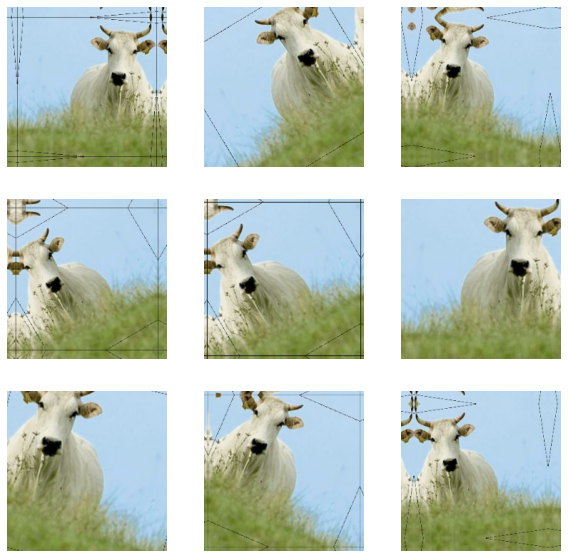

In [30]:


#Augmenting the images
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(2):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")



In [33]:


# Method 1.1: Functional way of building a model
inputs = tf.keras.Input(shape=image_size)
x = data_augmentation(inputs)
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(2,activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Method 1.2: This model is same as the above in 1.1
#Sequential way of building models
model = Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(2,activation='softmax'))



ValueError: ignored